In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df = pd.read_csv('TIME1.csv')
df.shape

(570131, 62)

In [3]:
df.shape
X = df.loc[df['ARR_DELAY_NEW']!=0]
X

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 61
7,2018,1,1,8,1,2018-01-08,EV,20366,EV,N614QX,...,59.0,1.0,383.0,2,0.0,0.0,0.0,0.0,61.0,NaN
14,2018,1,1,16,2,2018-01-16,EV,20366,EV,N611QX,...,71.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
15,2018,1,1,17,3,2018-01-17,EV,20366,EV,N613QX,...,NaN,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
21,2018,1,1,24,3,2018-01-24,EV,20366,EV,N616QX,...,67.0,1.0,383.0,2,162.0,0.0,0.0,0.0,6.0,NaN
28,2018,1,1,2,2,2018-01-02,EV,20366,EV,N616QX,...,54.0,1.0,383.0,2,26.0,0.0,0.0,0.0,0.0,NaN
29,2018,1,1,3,3,2018-01-03,EV,20366,EV,N608QX,...,51.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
34,2018,1,1,8,1,2018-01-08,EV,20366,EV,N614QX,...,NaN,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
35,2018,1,1,9,2,2018-01-09,EV,20366,EV,N613QX,...,59.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
37,2018,1,1,11,4,2018-01-11,EV,20366,EV,N614QX,...,64.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
38,2018,1,1,12,5,2018-01-12,EV,20366,EV,N604QX,...,58.0,1.0,383.0,2,16.0,0.0,0.0,0.0,0.0,NaN


In [4]:
pd.set_option('display.max_columns', None)


In [5]:
X_Carr=X.drop(['WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY'],axis=1)

In [6]:
X_weather=X.drop(['NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY','CARRIER_DELAY'],axis=1)

In [7]:
X_NAs=X.drop(['CARRIER_DELAY','WEATHER_DELAY','SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY'],axis=1)

In [8]:
X_late=X.drop(['CARRIER_DELAY','WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY'],axis=1)

In [9]:
X_Security=X.drop(['CARRIER_DELAY','WEATHER_DELAY','LATE_AIRCRAFT_DELAY','CARRIER_DELAY'],axis=1)

In [10]:
X_Carr.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,-0.020304,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,0.030792,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.041952,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,0.023627,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,-0.018065,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,-0.018065,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,-0.005126,NaN


In [11]:
X_weather.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,WEATHER_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,-0.010769,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,-0.003358,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.015424,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,0.008139,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,-0.033808,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,-0.033808,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,-0.009204,NaN


In [12]:
X_NAs.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,NAS_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,0.042258,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,-0.014501,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.056866,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,-0.028602,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,0.007365,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,0.007365,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,0.030897,NaN


In [13]:
X_late.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,LATE_AIRCRAFT_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,-0.059270,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,-0.007782,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.065362,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,0.052836,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,0.010071,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,0.010071,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,0.030263,NaN


In [14]:
X_Security.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,NAS_DELAY,SECURITY_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,0.042258,-0.010393,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,-0.014501,0.004121,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.056866,0.000231,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,-0.028602,0.002929,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,0.007365,0.005279,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,0.007365,0.005279,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,0.030897,0.009477,NaN


In [15]:
X.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 61
count,198069.0,198069.0,198069.0,198069.000000,198069.000000,198069.000000,198069.000000,198069.000000,1.980690e+05,198069.000000,198069.000000,198069.000000,198069.000000,1.980690e+05,198069.000000,198069.000000,198069.000000,198069.000000,181243.000000,181124.000000,181124.000000,181124.000000,181124.000000,181003.000000,181003.00000,180529.000000,180529.000000,198069.000000,180529.000000,179443.000000,179443.000000,179443.000000,179443.000000,198069.000000,198069.000000,198069.000000,179645.000000,179645.000000,198069.0,198069.000000,198069.000000,97766.000000,97766.000000,97766.000000,97766.000000,97766.000000,0.0
mean,2018.0,1.0,1.0,13.838233,3.559416,20028.262681,2737.110679,12623.220453,1.262326e+06,31706.993129,26.897707,52.661916,12667.545527,1.266758e+06,31746.579859,26.810465,51.725565,1364.916983,1405.769486,36.404022,37.571619,0.516646,1.646629,22.594288,1436.57146,1525.740629,8.683037,1533.175929,1526.259216,39.026426,39.026426,0.544830,1.893855,0.086697,0.006321,138.742277,141.773704,110.478321,1.0,763.301122,3.526423,21.474490,4.755171,14.285488,0.101651,25.647638,NaN
std,0.0,0.0,0.0,8.617821,1.963896,403.949158,1942.662797,1504.382288,1.504380e+05,1270.456376,16.084518,25.739621,1508.948208,1.508946e+05,1279.533304,16.254305,25.902448,474.383652,492.318135,73.479463,72.835228,0.499724,3.150803,14.693209,492.04048,542.505666,8.031690,504.789404,551.144916,71.362674,71.362674,0.497988,2.928407,0.281391,0.079253,70.939744,72.415853,70.168128,0.0,575.344061,2.262350,66.448225,35.696964,32.455476,3.412735,50.420374,NaN
min,2018.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,1.000000,1.000000,1.000000,-28.000000,0.000000,0.000000,-2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000,8.000000,1.0,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2018.0,1.0,1.0,6.000000,2.000000,19790.000000,1011.000000,11278.000000,1.127805e+06,30721.000000,12.000000,34.000000,11292.000000,1.129202e+06,30721.000000,12.000000,33.000000,951.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1042.00000,1144.000000,4.000000,1137.000000,1146.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,88.000000,89.000000,59.000000,1.0,338.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2018.0,1.0,1.0,13.000000,3.000000,19977.000000,2213.000000,12889.000000,1.288903e+06,31453.000000,26.000000,43.000000,12889.000000,1.288903e+06,31453.000000,26.000000,42.000000,1359.000000,1429.000000,16.000000,16.000000,1.000000,1.000000,18.000000,1446.00000,1606.000000,6.000000,1559.000000,1608.000000,17.000000,17.000000,1.000000,1.000000,0.000000,0.000000,120.000000,125.000000,92.000000,1.0,605.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,NaN
75%,2018.0,1.0,1.0,21.000000,5.000000,20397.000000,4470.000000,13930.000000,1.393006e+06,32467.000000,40.000000,74.000000,14027.000000,1.402702e+06,32467.000000,39.000000,74.000000,1745.000000,1816.000000,44.000000,44.000000,1.000000,2.000000,28.000000,1836.00000,1946.000000,10.000000,1935.000000,1950.000000,43.000000,43.000000,1.000000,2.000000,0.000000,0.000000,170.000000,174.000000,141.000000,1.0,1008.000000,5.000000,19.000000,0.000000,19.000000,0.000000,31.000000,Na

In [16]:
X_correct=X.loc[df['ARR_DELAY'] < 100]
X_correct


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 61
7,2018,1,1,8,1,2018-01-08,EV,20366,EV,N614QX,2815,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,943,1059.0,76.0,76.0,1.0,5.0,0900-0959,11.0,1110.0,1209.0,7.0,1115,1216.0,61.0,61.0,1.0,4.0,1100-1159,0.0,NaN,0.0,92.0,77.0,59.0,1.0,383.0,2,0.0,0.0,0.0,0.0,61.0,NaN
14,2018,1,1,16,2,2018-01-16,EV,20366,EV,N611QX,2815,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,943,940.0,-3.0,0.0,0.0,-1.0,0900-0959,15.0,955.0,1106.0,12.0,1115,1118.0,3.0,3.0,0.0,0.0,1100-1159,0.0,NaN,0.0,92.0,98.0,71.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
28,2018,1,1,2,2,2018-01-02,EV,20366,EV,N616QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,730,801.0,31.0,31.0,1.0,2.0,0700-0759,20.0,821.0,915.0,3.0,852,918.0,26.0,26.0,1.0,1.0,0800-0859,0.0,NaN,0.0,82.0,77.0,54.0,1.0,383.0,2,26.0,0.0,0.0,0.0,0.0,NaN
29,2018,1,1,3,3,2018-01-03,EV,20366,EV,N608QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,730,752.0,22.0,22.0,1.0,1.0,0700-0759,18.0,810.0,901.0,3.0,852,904.0,12.0,12.0,0.0,0.0,0800-0859,0.0,NaN,0.0,82.0,72.0,51.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
35,2018,1,1,9,2,2018-01-09,EV,20366,EV,N613QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,712.0,-3.0,0.0,0.0,-1.0,0700-0759,19.0,731.0,830.0,6.0,833,836.0,3.0,3.0,0.0,0.0,0800-0859,0.0,NaN,0.0,78.0,84.0,59.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
37,2018,1,1,11,4,2018-01-11,EV,20366,EV,N614QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,709.0,-6.0,0.0,0.0,-1.0,0700-0759,19.0,728.0,832.0,3.0,833,835.0,2.0,2.0,0.0,0.0,0800-0859,0.0,NaN,0.0,78.0,86.0,64.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
38,2018,1,1,12,5,2018-01-12,EV,20366,EV,N604QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,734.0,19.0,19.0,1.0,1.0,0700-0759,13.0,747.0,845.0,4.0,833,849.0,16.0,16.0,1.0,1.0,0800-0859,0.0,NaN,0.0,78.0,75.0,58.0,1.0,383.0,2,16.0,0.0,0.0,0.0,0.0,NaN
41,2018,1,1,16,2,2018-01-16,EV,20366,EV,N611QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,711.0,-4.0,0.0,0.0,-1.0,0700-0759,40.0,751.0,849.0,5.0,833,854.0,21.0,21.0,1.0,1.0,0800-0859,0.0,NaN,0.0,78.0,103.0,58.0,1.0,383.0,2,0.0,0.0,21.0,0.0,0.0,NaN
46,2018,1,1,22,1,2018-01-22,EV,20366,EV,N615QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,710.0,-5.0,0.0,0.0,-1.0,0700-0759,15.0,725.0,842.0,3.0,833,845.0,12.0,12.0,0.0,0.0,0800-0859,0.0,NaN,0.0,78.0,95.0,77.0,1.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
47,2018,1,1,23,2,2018-01-23,EV,20366,EV,N608QX,2815,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078105,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,715,711.

In [17]:
X_Carr=X_correct[['DEP_DELAY','DEP_DEL15','DAY_OF_WEEK','DEP_DELAY_NEW','ARR_DELAY_GROUP','CARRIER_DELAY']]

X_Carr.describe()

,DEP_DELAY,DEP_DEL15,DAY_OF_WEEK,DEP_DELAY_NEW,ARR_DELAY_GROUP,CARRIER_DELAY
count,162506.000000,162506.000000,162601.000000,162506.000000,162601.000000,80924.000000
mean,20.181298,0.469115,3.553410,21.453922,1.096451,11.156455
std,26.814689,0.499047,1.994637,25.641144,1.487158,18.639194
min,-28.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,3.000000,12.000000,0.000000,0.000000
75%,33.000000,1.000000,5.000000,33.000000,2.000000,16.000000
max,170.000000,1.000000,7.000000,170.000000,6.000000,99.000000


In [18]:
X_Carr['ARR_DELAY_GROUP']=X_Carr['ARR_DELAY_GROUP'].fillna(8)
X_Carr['DEP_DELAY']=X_Carr['DEP_DELAY'].fillna(20.18)
X_Carr['DEP_DEL15']=X_Carr['DEP_DEL15'].fillna(0.46)
X_Carr['DAY_OF_WEEK']=X_Carr['DAY_OF_WEEK'].fillna(3.55)
X_Carr['DEP_DELAY_NEW']=X_Carr['DEP_DELAY_NEW'].fillna(21.45)
X_Carr['CARRIER_DELAY']=X_Carr['CARRIER_DELAY'].fillna(999)


/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [19]:
X_Carr.shape

(162601, 6)

In [20]:
X_weather = X_correct[['DEP_DELAY_NEW','DEP_DELAY_GROUP','ARR_DELAY_NEW','ARR_DELAY_GROUP','WEATHER_DELAY']]

In [21]:
X_weather.describe()

,DEP_DELAY_NEW,DEP_DELAY_GROUP,ARR_DELAY_NEW,ARR_DELAY_GROUP,WEATHER_DELAY
count,162506.000000,162506.000000,162601.000000,162601.000000,80924.000000
mean,21.453922,0.848763,22.763587,1.096451,1.491659
std,25.641144,1.838905,22.604005,1.487158,7.776411
min,0.000000,-2.000000,1.000000,0.000000,0.000000
25%,0.000000,-1.000000,6.000000,0.000000,0.000000
50%,12.000000,0.000000,14.000000,0.000000,0.000000
75%,33.000000,2.000000,32.000000,2.000000,0.000000
max,170.000000,11.000000,99.000000,6.000000,99.000000


In [22]:
X_weather['ARR_DELAY_GROUP']=X_weather['ARR_DELAY_GROUP'].fillna(8)
X_weather['DEP_DELAY_NEW']=X_weather['DEP_DELAY_NEW'].fillna(21.4)
X_weather['DEP_DELAY_GROUP']=X_weather['DEP_DELAY_GROUP'].fillna(13)
X_weather['ARR_DELAY_NEW']=X_weather['ARR_DELAY_NEW'].fillna(22.7)
X_weather['WEATHER_DELAY']=X_weather['WEATHER_DELAY'].fillna(999)

/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [23]:
X_NAs = X_correct[['TAXI_OUT','ARR_DELAY_NEW','ARR_DELAY_GROUP','NAS_DELAY']]

In [24]:
X_NAs.describe()

,TAXI_OUT,ARR_DELAY_NEW,ARR_DELAY_GROUP,NAS_DELAY
count,162601.000000,162601.000000,162601.000000,80924.000000
mean,22.260902,22.763587,1.096451,11.793980
std,13.675354,22.604005,1.487158,17.137301
min,1.000000,1.000000,0.000000,0.000000
25%,13.000000,6.000000,0.000000,0.000000
50%,18.000000,14.000000,0.000000,2.000000
75%,28.000000,32.000000,2.000000,19.000000
max,145.000000,99.000000,6.000000,99.000000


In [25]:
X_NAs['TAXI_OUT']=X_NAs['TAXI_OUT'].fillna(22.26)
X_NAs['ARR_DELAY_NEW']=X_NAs['ARR_DELAY_NEW'].fillna(22.7)
X_NAs['ARR_DELAY_GROUP']=X_NAs['ARR_DELAY_GROUP'].fillna(8)
X_NAs['NAS_DELAY']=X_NAs['NAS_DELAY'].fillna(999)

/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [26]:
X_late = X_correct[['AIRLINE_ID','FL_NUM','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP','WHEELS_OFF','ARR_DELAY','LATE_AIRCRAFT_DELAY']]

In [27]:
X_late.describe()

,AIRLINE_ID,FL_NUM,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,WHEELS_OFF,ARR_DELAY,LATE_AIRCRAFT_DELAY
count,162601.000000,162601.000000,162506.000000,162506.000000,162506.000000,162601.000000,162601.000000,80924.000000
mean,20006.467679,2680.890130,21.453922,0.469115,0.848763,1424.850567,22.763587,14.733169
std,409.360886,1937.993765,25.641144,0.499047,1.838905,484.356332,22.604005,21.737831
min,19393.000000,1.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,0.000000
25%,19790.000000,956.000000,0.000000,0.000000,-1.000000,1032.000000,6.000000,0.000000
50%,19977.000000,2116.000000,12.000000,0.000000,0.000000,1435.000000,14.000000,0.000000
75%,20397.000000,4402.000000,33.000000,1.000000,2.000000,1827.000000,32.000000,23.000000
max,21171.000000,7439.000000,170.000000,1.000000,11.000000,2400.000000,99.000000,99.000000


In [28]:
X_late['AIRLINE_ID']=X_late['AIRLINE_ID'].fillna(0)
X_late['FL_NUM']=X_late['FL_NUM'].fillna(0)
X_late['DEP_DELAY_NEW']=X_late['DEP_DELAY_NEW'].fillna(21.45)
X_late['DEP_DEL15']=X_late['DEP_DEL15'].fillna(0.46)
X_late['DEP_DELAY_GROUP']=X_late['DEP_DELAY_GROUP'].fillna(14)
X_late['WHEELS_OFF']=X_late['WHEELS_OFF'].fillna(1424.5)
X_late['ARR_DELAY']=X_late['ARR_DELAY'].fillna(22.7)
X_late['LATE_AIRCRAFT_DELAY']=X_late['LATE_AIRCRAFT_DELAY'].fillna(999)

/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anirudhv/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [29]:
X_late

,AIRLINE_ID,FL_NUM,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,WHEELS_OFF,ARR_DELAY,LATE_AIRCRAFT_DELAY
7,20366,2815,76.0,1.0,5.0,1110.0,61.0,61.0
14,20366,2815,0.0,0.0,-1.0,955.0,3.0,999.0
28,20366,2815,31.0,1.0,2.0,821.0,26.0,0.0
29,20366,2815,22.0,1.0,1.0,810.0,12.0,999.0
35,20366,2815,0.0,0.0,-1.0,731.0,3.0,999.0
37,20366,2815,0.0,0.0,-1.0,728.0,2.0,999.0
38,20366,2815,19.0,1.0,1.0,747.0,16.0,0.0
41,20366,2815,0.0,0.0,-1.0,751.0,21.0,0.0
46,20366,2815,0.0,0.0,-1.0,725.0,12.0,999.0
47,20366,2815,0.0,0.0,-1.0,736.0,1.0,999.0


In [30]:
X_Security.corr()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,NAS_DELAY,SECURITY_DELAY,Unnamed: 61
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUARTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,NaN,1.000000,0.039792,0.017153,0.014449,0.013297,0.013296,-0.001356,-0.014150,0.033734,0.002077,0.002077,-0.019974,0.008860,0.014126,-0.034404,-0.042631,-0.078148,-0.073538,-0.117380,-0.108149,0.083100,-0.034545,0.010767,-0.032841,-0.003213,0.015348,-0.061851,-0.061851,-0.085607,-0.082957,-0.101503,-0.003197,-0.032155,-0.006057,-0.020003,NaN,-0.036089,-0.034890,0.042258,-0.010393,NaN
DAY_OF_WEEK,NaN,NaN,NaN,0.039792,1.000000,0.003977,0.020158,0.009000,0.009000,0.013226,-0.011669,0.014866,0.007642,0.007642,0.014256,-0.008988,0.010789,0.037051,0.036720,-0.003176,-0.003021,-0.026165,-0.006897,-0.062289,0.031866,0.024078,0.018464,0.029996,0.023253,-0.009589,-0.009589,-0.041228,-0.015109,0.001706,0.018088,0.027303,0.017323,0.028867,NaN,0.032767,0.032348,-0.014501,0.004121,NaN
AIRLINE_ID,NaN,NaN,NaN,0.017153,0.003977,1.000000,0.333834,-0.043633,-0.043633,0.036858,0.108901,-0.153850,-0.046116,-0.046116,0.039155,0.118152,-0.146134,-0.044446,-0.043270,0.069658,0.074840,-0.000490,0.071920,0.199111,-0.036390,-0.045000,0.129341,-0.046371,-0.044991,0.098280,0.098280,0.081674,0.120865,0.068767,0.008853,-0.049642,-0.021679,-0.078997,NaN,-0.097539,-0.097415,0.056866,0.000231,NaN
FL_NUM,NaN,NaN,NaN,0.014449,0.020158,0.333834,1.000000,-0.035030,-0.035030,-0.002072,0.106847,0.041372,-0.051787,-0.051788,-0.008386,0.110504,0.040436,-0.001102,0.012390,0.036367,0.037041,0.017437,0.034480,0.085868,0.022138,0.014010,-0.012611,0.002103,0.019621,0.042986,0.042986,0.036020,0.045794,0.051820,0.008871,-0.318343,-0.306633,-0.332965,NaN,-0.347270,-0.345385,-0.028602,0.002929,NaN
ORIGIN_AIRPORT_ID,NaN,NaN,NaN,0.013297,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169665,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024654,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035862,0.004589,0.052353,0.051133,0.056749,NaN,0.083227,0.088256,0.007365,0.005279,NaN
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,NaN,0.013296,0.009000,-0.043633,-0.035030,1.000000,1.000000,0.610262,-0.169667,0.249883,0.015289,0.015289,-0.014881,-0.063020,0.138466,-0.020444,-0.020686,-0.018319,-0.017464,-0.019355,-0.024872,-0.032379,-0.019936,0.004676,0.024653,-0.001088,0.009748,-0.018838,-0.018838,-0.015360,-0.026257,-0.035863,0.004589,0.052353,0.051134,0.056750,NaN,0.083228,0.088256,0.007365,0.005279,NaN
ORIGIN_CITY_MARKET_ID,NaN,NaN,NaN,-0.001356,0.013226,0.036858,-0.002072,0.610262,0.610262,1.000000,-0.019975,0.055072,-0.005006,-0.005006,-0.060471,-0.059921,0.026621,-0.056224,-0.049417,0.012638,0.014138,-0.005697,0.007889,-0.015436,-0.049079,-0.027452,0.078536,-0.048914,-0.020859,0.016261,0.016261,0.004178,0.012667,0.007632,0.002144,0.019642,0.022497,0.017379,NaN,0.023439,0.025816,0.030897,0.009477,NaN


In [31]:
X_Carr_train=X_Carr[X_Carr['CARRIER_DELAY'] < 999]
X_Carr_train=X_Carr_train.drop(['CARRIER_DELAY'],axis=1)
X_Carr_train

,DEP_DELAY,DEP_DEL15,DAY_OF_WEEK,DEP_DELAY_NEW,ARR_DELAY_GROUP
7,76.0,1.0,1,76.0,4.0
28,31.0,1.0,2,31.0,1.0
38,19.0,1.0,5,19.0,1.0
41,-4.0,0.0,2,0.0,1.0
51,47.0,1.0,6,47.0,2.0
62,26.0,1.0,2,26.0,1.0
86,61.0,1.0,2,61.0,3.0
87,65.0,1.0,3,65.0,3.0
117,75.0,1.0,2,75.0,4.0
118,74.0,1.0,3,74.0,4.0


In [32]:
X_Carr_test=X_Carr[X_Carr['CARRIER_DELAY']== 999]
X_Carr_test=X_Carr_test.drop(['CARRIER_DELAY'],axis=1)
X_Carr_test

,DEP_DELAY,DEP_DEL15,DAY_OF_WEEK,DEP_DELAY_NEW,ARR_DELAY_GROUP
14,-3.0,0.0,2,0.0,0.0
29,22.0,1.0,3,22.0,0.0
35,-3.0,0.0,2,0.0,0.0
37,-6.0,0.0,4,0.0,0.0
46,-5.0,0.0,1,0.0,0.0
47,-4.0,0.0,2,0.0,0.0
53,-3.0,0.0,2,0.0,0.0
58,17.0,1.0,5,17.0,0.0
67,-8.0,0.0,7,0.0,0.0
68,-3.0,0.0,1,0.0,0.0


In [33]:
Y_Carr  = X_Carr[['CARRIER_DELAY']]

In [34]:
Y_Carr_test=Y_Carr[Y_Carr['CARRIER_DELAY']== 999]
Y_Carr_train=Y_Carr[Y_Carr['CARRIER_DELAY']< 999]


In [35]:
Y_Carr_test
Y_Carr_train

,CARRIER_DELAY
7,0.0
28,26.0
38,16.0
41,0.0
51,42.0
62,15.0
86,0.0
87,0.0
117,70.0
118,72.0


In [37]:
from sklearn import linear_model, svm
from sklearn import cross_validation
X_train, X_test, y_train, y_test = X_Carr_train, X_Carr_test, Y_Carr_train,Y_Carr_test

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_Carr_res = clf.predict(X_test)


In [38]:
X_weather_train=X_weather[X_weather['WEATHER_DELAY'] < 999]
X_weather_train=X_weather_train.drop(['WEATHER_DELAY'],axis=1)
X_weather_train

,DEP_DELAY_NEW,DEP_DELAY_GROUP,ARR_DELAY_NEW,ARR_DELAY_GROUP
7,76.0,5.0,61.0,4.0
28,31.0,2.0,26.0,1.0
38,19.0,1.0,16.0,1.0
41,0.0,-1.0,21.0,1.0
51,47.0,3.0,42.0,2.0
62,26.0,1.0,15.0,1.0
86,61.0,4.0,48.0,3.0
87,65.0,4.0,53.0,3.0
117,75.0,5.0,70.0,4.0
118,74.0,4.0,72.0,4.0


In [39]:
X_weather_test=X_weather[X_weather['WEATHER_DELAY']== 999]
X_weather_test=X_weather_test.drop(['WEATHER_DELAY'],axis=1)
X_weather_test

,DEP_DELAY_NEW,DEP_DELAY_GROUP,ARR_DELAY_NEW,ARR_DELAY_GROUP
14,0.0,-1.0,3.0,0.0
29,22.0,1.0,12.0,0.0
35,0.0,-1.0,3.0,0.0
37,0.0,-1.0,2.0,0.0
46,0.0,-1.0,12.0,0.0
47,0.0,-1.0,1.0,0.0
53,0.0,-1.0,5.0,0.0
58,17.0,1.0,6.0,0.0
67,0.0,-1.0,3.0,0.0
68,0.0,-1.0,9.0,0.0


In [40]:
Y_weather  = X_weather[['WEATHER_DELAY']]

In [41]:
Y_weather_test=Y_weather[Y_weather['WEATHER_DELAY']== 999]
Y_weather_train=Y_weather[Y_weather['WEATHER_DELAY']< 999]

In [42]:

X_train, X_test, y_train, y_test = X_weather_train, X_weather_test, Y_weather_train,Y_weather_test

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_weather_res = clf.predict(X_test)

In [43]:
X_NAs_train=X_NAs[X_NAs['NAS_DELAY'] < 999]
X_NAs_train=X_NAs_train.drop(['NAS_DELAY'],axis=1)
X_NAs_train

,TAXI_OUT,ARR_DELAY_NEW,ARR_DELAY_GROUP
7,11.0,61.0,4.0
28,20.0,26.0,1.0
38,13.0,16.0,1.0
41,40.0,21.0,1.0
51,16.0,42.0,2.0
62,11.0,15.0,1.0
86,14.0,48.0,3.0
87,11.0,53.0,3.0
117,18.0,70.0,4.0
118,18.0,72.0,4.0


In [44]:
X_NAs_test=X_NAs[X_NAs['NAS_DELAY']== 999]
X_NAs_test=X_NAs_test.drop(['NAS_DELAY'],axis=1)
X_NAs_test

,TAXI_OUT,ARR_DELAY_NEW,ARR_DELAY_GROUP
14,15.0,3.0,0.0
29,18.0,12.0,0.0
35,19.0,3.0,0.0
37,19.0,2.0,0.0
46,15.0,12.0,0.0
47,25.0,1.0,0.0
53,25.0,5.0,0.0
58,17.0,6.0,0.0
67,34.0,3.0,0.0
68,34.0,9.0,0.0


In [45]:
Y_NAs  = X_NAs[['NAS_DELAY']]
Y_NAs_test=Y_NAs[Y_NAs['NAS_DELAY']== 999]
Y_NAs_train=Y_NAs[Y_NAs['NAS_DELAY']< 999]

In [46]:
from sklearn import linear_model, svm
from sklearn import cross_validation
X_train, X_test, y_train, y_test = X_NAs_train, X_NAs_test, Y_NAs_train,Y_NAs_test

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_NAS_res = clf.predict(X_test)


In [47]:
X_late_train=X_late[X_late['LATE_AIRCRAFT_DELAY'] < 999]
X_late_train=X_late_train.drop(['LATE_AIRCRAFT_DELAY'],axis=1)
X_late_train

,AIRLINE_ID,FL_NUM,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,WHEELS_OFF,ARR_DELAY
7,20366,2815,76.0,1.0,5.0,1110.0,61.0
28,20366,2815,31.0,1.0,2.0,821.0,26.0
38,20366,2815,19.0,1.0,1.0,747.0,16.0
41,20366,2815,0.0,0.0,-1.0,751.0,21.0
51,20366,2815,47.0,1.0,3.0,818.0,42.0
62,20366,2816,26.0,1.0,1.0,714.0,15.0
86,20366,2817,61.0,1.0,4.0,1334.0,48.0
87,20366,2817,65.0,1.0,4.0,1335.0,53.0
117,20366,2817,75.0,1.0,5.0,1203.0,70.0
118,20366,2817,74.0,1.0,4.0,1202.0,72.0


In [48]:
X_late_test=X_late[X_late['LATE_AIRCRAFT_DELAY']== 999]
X_late_test=X_late_test.drop(['LATE_AIRCRAFT_DELAY'],axis=1)
X_late_test

,AIRLINE_ID,FL_NUM,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,WHEELS_OFF,ARR_DELAY
14,20366,2815,0.0,0.0,-1.0,955.0,3.0
29,20366,2815,22.0,1.0,1.0,810.0,12.0
35,20366,2815,0.0,0.0,-1.0,731.0,3.0
37,20366,2815,0.0,0.0,-1.0,728.0,2.0
46,20366,2815,0.0,0.0,-1.0,725.0,12.0
47,20366,2815,0.0,0.0,-1.0,736.0,1.0
53,20366,2815,0.0,0.0,-1.0,737.0,5.0
58,20366,2816,17.0,1.0,1.0,714.0,6.0
67,20366,2816,0.0,0.0,-1.0,703.0,3.0
68,20366,2816,0.0,0.0,-1.0,708.0,9.0


In [49]:
Y_late  = X_late[['LATE_AIRCRAFT_DELAY']]
Y_late_test=Y_late[Y_late['LATE_AIRCRAFT_DELAY']== 999]
Y_late_train=Y_late[Y_late['LATE_AIRCRAFT_DELAY']< 999]

In [50]:
from sklearn import linear_model, svm
from sklearn import cross_validation
X_train, X_test, y_train, y_test = X_late_train, X_late_test, Y_late_train,Y_late_test

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_late_res = clf.predict(X_test)

In [51]:
data=X_late_test['ARR_DELAY']

In [52]:
from pandas import DataFrame
Y_Carr_res = DataFrame(data=y_Carr_res)
Y_Carr_res.columns = ['C']
#Y_Carr_res = Y_Carr_res.rename(columns = {"0" : "Carrier"})
#Y_Carr_res.rename(index=str, columns={"0": "C"})
Y_NAS_res = DataFrame(data=y_NAS_res)
Y_NAS_res.columns = ['N']
Y_Weather_res = DataFrame(data=y_weather_res)
Y_Weather_res.columns = ['W']
Y_late_res = DataFrame(data=y_late_res)
Y_late_res.columns = ['L']

In [53]:

#Y_Carr_res=pd.DataFrame(data=y_Carr_res[0:,1:], index=y_Carr_res[0:,0], columns=y_Carr_res[0,1:])
#Y_NAS_res=pd.DataFrame(data=y_Carr_res[0:,1:], index=y_NAS_res[0:,0], columns=y_NAS_res[0,1:])

In [54]:
result = pd.concat([Y_NAS_res, Y_Carr_res], axis=1)
result = pd.concat([result,Y_Weather_res],axis=1)
result = pd.concat([result,Y_late_res],axis=1)
result

,N,C,W,L
0,1.798751,-0.956551,-0.558991,-5.676817
1,5.076121,6.294841,-0.010648,1.173680
2,4.052301,-0.956551,-0.558991,-7.038702
3,3.875944,-0.679585,-0.600782,-7.194274
4,3.385959,-1.857078,-0.182867,-5.839188
5,7.079912,-1.174278,-0.642574,-7.282967
6,7.785338,-0.956551,-0.475408,-6.727557
7,3.454595,6.135356,-0.240765,-2.129283
8,12.503112,0.280182,-0.558991,-7.208044
9,13.561251,-1.421625,-0.308242,-6.353649


In [55]:
data1 = DataFrame(data=data)

In [56]:
data1.shape

(81677, 1)

In [57]:
result[result<0]=0
result

,N,C,W,L
0,1.798751,0.000000,0.000000,0.000000
1,5.076121,6.294841,0.000000,1.173680
2,4.052301,0.000000,0.000000,0.000000
3,3.875944,0.000000,0.000000,0.000000
4,3.385959,0.000000,0.000000,0.000000
5,7.079912,0.000000,0.000000,0.000000
6,7.785338,0.000000,0.000000,0.000000
7,3.454595,6.135356,0.000000,0.000000
8,12.503112,0.280182,0.000000,0.000000
9,13.561251,0.000000,0.000000,0.000000


In [58]:
data1

,ARR_DELAY
14,3.0
29,12.0
35,3.0
37,2.0
46,12.0
47,1.0
53,5.0
58,6.0
67,3.0
68,9.0


In [59]:
result['New_Delay']=result['C']+result['N']+result['W']+result['L']

In [60]:
result

,N,C,W,L,New_Delay
0,1.798751,0.000000,0.000000,0.000000,1.798751
1,5.076121,6.294841,0.000000,1.173680,12.544642
2,4.052301,0.000000,0.000000,0.000000,4.052301
3,3.875944,0.000000,0.000000,0.000000,3.875944
4,3.385959,0.000000,0.000000,0.000000,3.385959
5,7.079912,0.000000,0.000000,0.000000,7.079912
6,7.785338,0.000000,0.000000,0.000000,7.785338
7,3.454595,6.135356,0.000000,0.000000,9.589952
8,12.503112,0.280182,0.000000,0.000000,12.783294
9,13.561251,0.000000,0.000000,0.000000,13.561251


In [61]:
import numpy as np
from sklearn.metrics import accuracy_score

In [62]:
r1= result['New_Delay']

In [63]:
result


,N,C,W,L,New_Delay
0,1.798751,0.000000,0.000000,0.000000,1.798751
1,5.076121,6.294841,0.000000,1.173680,12.544642
2,4.052301,0.000000,0.000000,0.000000,4.052301
3,3.875944,0.000000,0.000000,0.000000,3.875944
4,3.385959,0.000000,0.000000,0.000000,3.385959
5,7.079912,0.000000,0.000000,0.000000,7.079912
6,7.785338,0.000000,0.000000,0.000000,7.785338
7,3.454595,6.135356,0.000000,0.000000,9.589952
8,12.503112,0.280182,0.000000,0.000000,12.783294
9,13.561251,0.000000,0.000000,0.000000,13.561251


In [64]:
d1 = data1['ARR_DELAY']

In [65]:
d1.shape

(81677,)

In [66]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(d1, r1))
RSME_line = np.sqrt(mean_squared_error(d1,r1))
print ("RMSE : %.2f" %RSME_line)

Mean squared error: 46.84
RMSE : 6.84


from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(d1, r1))

In [67]:
import matplotlib.pyplot as plt

In [68]:
r1_zscore = (r1-r1.mean())/r1.std()

In [69]:
r1_zscore

0       -1.214484
1        0.445826
2       -0.866296
3       -0.893544
4       -0.969250
5       -0.398510
6       -0.289517
7       -0.010693
8        0.482700
9        0.602899
10      -0.185524
11      -0.697504
12       0.352363
13      -0.814604
14       0.775834
15      -0.142671
16      -0.371262
17       0.447163
18       0.967502
19      -0.821450
20       1.277788
21      -0.028376
22      -1.181934
23      -1.492403
24      -0.814222
25       0.456161
26      -1.352428
27      -0.095478
28       0.680328
29      -0.866296
           ...   
81647   -1.328780
81648   -1.443075
81649   -1.492403
81650   -1.185018
81651   -1.100189
81652   -1.007840
81653    0.539276
81654   -0.926095
81655   -1.484334
81656   -0.697528
81657   -1.045693
81658   -0.811899
81659   -1.492403
81660   -1.203143
81661   -1.427575
81662   -1.225089
81663   -0.256967
81664   -1.268981
81665    1.282632
81666   -0.659651
81667   -1.173172
81668   -0.839048
81669    1.124452
81670    0.008241
81671   -0

In [70]:
d1.index = range(81677)

In [71]:
d1

0         3.0
1        12.0
2         3.0
3         2.0
4        12.0
5         1.0
6         5.0
7         6.0
8         3.0
9         9.0
10       11.0
11        6.0
12        3.0
13        3.0
14       12.0
15        4.0
16        2.0
17       10.0
18        6.0
19        3.0
20       10.0
21        5.0
22        1.0
23        1.0
24        1.0
25       11.0
26        6.0
27        7.0
28        8.0
29        3.0
         ... 
81647     2.0
81648     1.0
81649     6.0
81650    11.0
81651     4.0
81652     1.0
81653    10.0
81654     4.0
81655    12.0
81656     9.0
81657     6.0
81658     9.0
81659     6.0
81660    13.0
81661     9.0
81662     9.0
81663     3.0
81664     1.0
81665     2.0
81666     1.0
81667     5.0
81668     4.0
81669    10.0
81670     3.0
81671     2.0
81672     5.0
81673     8.0
81674     3.0
81675     1.0
81676    11.0
Name: ARR_DELAY, Length: 81677, dtype: float64

In [72]:
d1_zscore = (d1-d1.mean())/d1.std()

In [73]:
d1_zscore

0       -0.866152
1        1.411209
2       -0.866152
3       -1.119193
4        1.411209
5       -1.372233
6       -0.360072
7       -0.107032
8       -0.866152
9        0.652089
10       1.158169
11      -0.107032
12      -0.866152
13      -0.866152
14       1.411209
15      -0.613112
16      -1.119193
17       0.905129
18      -0.107032
19      -0.866152
20       0.905129
21      -0.360072
22      -1.372233
23      -1.372233
24      -1.372233
25       1.158169
26      -0.107032
27       0.146008
28       0.399049
29      -0.866152
           ...   
81647   -1.119193
81648   -1.372233
81649   -0.107032
81650    1.158169
81651   -0.613112
81652   -1.372233
81653    0.905129
81654   -0.613112
81655    1.411209
81656    0.652089
81657   -0.107032
81658    0.652089
81659   -0.107032
81660    1.664250
81661    0.652089
81662    0.652089
81663   -0.866152
81664   -1.372233
81665   -1.119193
81666   -1.372233
81667   -0.360072
81668   -0.613112
81669    0.905129
81670   -0.866152
81671   -1

In [74]:
r1_zscore[0]/d1_zscore[0]

1.4021601995535407

In [75]:
pop = r1_zscore/d1_zscore
pop.mean()

0.41717999094757163

In [76]:

get_ipython().run_cell_magic(u'HTML', u'', u'<h1>Ridge Regression</h1>')

In [77]:
from sklearn.linear_model import Ridge
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = X_late_train, X_late_test, Y_late_train,Y_late_test
clf = Ridge(alpha=1.0)
clf.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
y_res_ridgel = clf.predict(X_test_ridge)
print y_res_ridgel

[[-5.67689216]
 [ 1.17373434]
 [-7.03877428]
 ...
 [ 0.34571086]
 [-2.3773416 ]
 [-4.71339891]]


In [79]:
from sklearn.linear_model import Ridge
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = X_Carr_train, X_Carr_test, Y_Carr_train,Y_Carr_test
clf = Ridge(alpha=1.0)
clf.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
y_res_ridgec = clf.predict(X_test_ridge)
y_res_ridgec

array([[-0.95645237],
       [ 6.29482292],
       [-0.95645237],
       ...,
       [-1.58006766],
       [-1.36233033],
       [ 0.78640882]])

In [81]:
from sklearn.linear_model import Ridge
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = X_NAs_train, X_NAs_test, Y_NAs_train,Y_NAs_test
clf = Ridge(alpha=1.0)
clf.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
y_res_ridgen = clf.predict(X_test_ridge)

In [83]:
from sklearn.linear_model import Ridge
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = X_weather_train, X_weather_test, Y_weather_train,Y_weather_test
clf = Ridge(alpha=1.0)
clf.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
y_res_ridgew = clf.predict(X_test_ridge)

In [85]:
from pandas import DataFrame
y_res_ridgel = DataFrame(data=y_res_ridgel)
y_res_ridgel.columns = ['L']
#Y_Carr_res = Y_Carr_res.rename(columns = {"0" : "Carrier"})
#Y_Carr_res.rename(index=str, columns={"0": "C"})
y_res_ridgec = DataFrame(data=y_res_ridgec)
y_res_ridgec.columns = ['C']
y_res_ridgen = DataFrame(data=y_res_ridgen)
y_res_ridgen.columns = ['N']
y_res_ridgew = DataFrame(data=y_res_ridgew)
y_res_ridgew.columns = ['W']

In [86]:
result = pd.concat([y_res_ridgel, y_res_ridgec], axis=1)
result = pd.concat([result,y_res_ridgen],axis=1)
result = pd.concat([result,y_res_ridgew],axis=1)
result

,L,C,N,W
0,-5.676892,-0.956452,1.798764,-0.558989
1,1.173734,6.294823,5.076072,-0.010639
2,-7.038774,-0.956452,4.052314,-0.558989
3,-7.194348,-0.679522,3.875964,-0.600782
4,-5.839248,-1.856998,3.385910,-0.182853
5,-7.283043,-1.174190,7.079939,-0.642575
6,-6.727628,-0.956452,7.785337,-0.475403
7,-2.129224,6.135316,3.454587,-0.240767
8,-7.208116,0.280218,12.503125,-0.558989
9,-6.353713,-1.421524,13.561222,-0.308232


In [87]:
result[result<0]=0
result

,L,C,N,W
0,0.000000,0.000000,1.798764,0.00000
1,1.173734,6.294823,5.076072,0.00000
2,0.000000,0.000000,4.052314,0.00000
3,0.000000,0.000000,3.875964,0.00000
4,0.000000,0.000000,3.385910,0.00000
5,0.000000,0.000000,7.079939,0.00000
6,0.000000,0.000000,7.785337,0.00000
7,0.000000,6.135316,3.454587,0.00000
8,0.000000,0.280218,12.503125,0.00000
9,0.000000,0.000000,13.561222,0.00000


In [88]:
data=X_late_test['ARR_DELAY']

In [89]:
data1 = DataFrame(data=data)

In [90]:
data1

,ARR_DELAY
14,3.0
29,12.0
35,3.0
37,2.0
46,12.0
47,1.0
53,5.0
58,6.0
67,3.0
68,9.0


In [91]:
d1 = data1['ARR_DELAY']

In [92]:
d1.index = range(81677)

In [93]:
result['New_Delay']=result['C']+result['N']+result['W']+result['L']

In [94]:
r1 = result['New_Delay']

In [95]:
r1_zscore = (r1-r1.mean())/r1.std()

In [96]:
d1_zscore = (d1-d1.mean())/d1.std()

In [97]:
pop = r1_zscore/d1_zscore
pop.mean()

0.4171774362186762

In [98]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(d1, r1))
RSME_ridge = np.sqrt(mean_squared_error(d1,r1))
print ("RMSE : %.2f" %RSME_ridge)

Mean squared error: 46.84
RMSE : 6.84


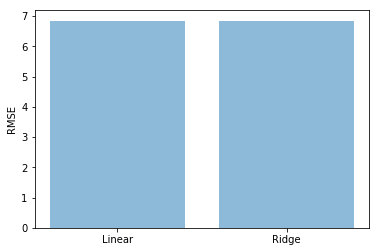

In [99]:
obj = ("Linear","Ridge")
y_pos = np.arange(len(obj))
per = [RSME_line,RSME_ridge]
plt.bar(y_pos,per,align = 'center',alpha = 0.5 )
plt.xticks(y_pos,obj)
plt.ylabel('RMSE')
plt.show()
get_ipython().run_cell_magic(u'HTML', u'', u'<h1>Logistic Regression</h1>')

In [106]:
from sklearn import linear_model, datasets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = X_weather_train, X_weather_test, Y_weather_train,Y_weather_test
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_poly, y_train_poly)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [108]:
y_res_logw = logreg.predict(X_test_poly)

In [109]:
print y_res_logw

[0. 0. 0. ... 0. 0. 0.]


In [114]:
from sklearn import linear_model, datasets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = X_Carr_train, X_Carr_test, Y_Carr_train,Y_Carr_test
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_poly, y_train_poly)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [115]:
y_res_logc = logreg.predict(X_test_poly)

In [116]:
from sklearn import linear_model, datasets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = X_NAs_train, X_NAs_test, Y_NAs_train,Y_NAs_test
logreg = Ridge(alpha=1.0)
logreg.fit(X_train_poly, y_train_poly)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
y_res_logn = logreg.predict(X_test_poly)

In [122]:
from sklearn import linear_model, datasets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = X_late_train, X_late_test, Y_late_train,Y_late_test
logreg = Ridge(alpha=1.0)
logreg.fit(X_train_poly, y_train_poly)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
y_res_logl = logreg.predict(X_test_poly)

In [126]:
from pandas import DataFrame
y_res_logw = DataFrame(data=y_res_logw)
y_res_logw.columns = ['W']
#Y_Carr_res = Y_Carr_res.rename(columns = {"0" : "Carrier"})
#Y_Carr_res.rename(index=str, columns={"0": "C"})
y_res_logc = DataFrame(data=y_res_logc)
y_res_logc.columns = ['C']
y_res_logn = DataFrame(data=y_res_logn)
y_res_logn.columns = ['N']
y_res_logl = DataFrame(data=y_res_logl)
y_res_logl.columns = ['L']

In [127]:
result = pd.concat([y_res_logw, y_res_logc], axis=1)
result = pd.concat([result,y_res_logn],axis=1)
result = pd.concat([result,y_res_logw],axis=1)
result

,W,C,N,W
0,0.0,0.0,-5.676892,0.0
1,0.0,0.0,1.173734,0.0
2,0.0,0.0,-7.038774,0.0
3,0.0,0.0,-7.194348,0.0
4,0.0,0.0,-5.839248,0.0
5,0.0,0.0,-7.283043,0.0
6,0.0,0.0,-6.727628,0.0
7,0.0,0.0,-2.129224,0.0
8,0.0,0.0,-7.208116,0.0
9,0.0,0.0,-6.353713,0.0
